In [1]:
import pandas as pd

file_path = 'mortalidad_materna_2002_2022.xlsx'
data = pd.read_excel(file_path)

# Mostrar las primeras filas del dataset
print(data.head())

# Mostrar información general del dataset
print(data.info())

# Describir las estadísticas básicas del dataset
print(data.describe())

   ANIO_NACIMIENTO  MES_NACIMIENTO  MES_NACIMIENTOD  DIA_NACIMIENTO  EDAD  \
0                0               0  NO ESPECIFICADO               0    22   
1                0               0  NO ESPECIFICADO               0   998   
2                0               0  NO ESPECIFICADO               0    23   
3                0               0  NO ESPECIFICADO               0   998   
4                0               0  NO ESPECIFICADO               0    29   

   ESTADO_CONYUGAL ESTADO_CONYUGALD  ENTIDAD_RESIDENCIA  \
0                1          SOLTERO                   7   
1                4      UNION LIBRE                  21   
2                5           CASADO                  13   
3                1          SOLTERO                  12   
4                5           CASADO                  33   

              ENTIDAD_RESIDENCIAD  MUNICIPIO_RESIDENCIA  ... DIA_REGISTRO  \
0                         CHIAPAS                    57  ...           24   
1                          P

In [2]:
import numpy as np

# Paso 1: Reemplazar valores 'NO ESPECIFICADO' con NaN
data.replace('NO ESPECIFICADO', np.nan, inplace=True)

# Paso 2: Reemplazar valores 0 en columnas específicas con NaN
columns_to_replace_zeros = ['ANIO_NACIMIENTO', 'MES_NACIMIENTO', 'DIA_NACIMIENTO', 'EDAD']
data[columns_to_replace_zeros] = data[columns_to_replace_zeros].replace(0, np.nan)

# Paso 3: Manejar valores atípicos en la columna EDAD (mayores a 120 se reemplazan por NaN)
data['EDAD'] = data['EDAD'].apply(lambda x: np.nan if x > 120 else x)

# Paso 4: Asegurar que los valores de columnas de fecha estén en un rango válido
data['ANIO_NACIMIENTO'] = data['ANIO_NACIMIENTO'].apply(lambda x: x if 1900 <= x <= 2022 else np.nan)

# Paso 5: Corregir valores fuera de rango en las columnas de día (máximo 31) y mes (máximo 12)
data['DIA_REGISTRO'] = data['DIA_REGISTRO'].apply(lambda x: x if 1 <= x <= 31 else np.nan)
data['DIA_CERTIFICACION'] = data['DIA_CERTIFICACION'].apply(lambda x: x if 1 <= x <= 31 else np.nan)
data['MES_REGISTRO'] = data['MES_REGISTRO'].apply(lambda x: x if 1 <= x <= 12 else np.nan)
data['MES_CERTIFICACION'] = data['MES_CERTIFICACION'].apply(lambda x: x if 1 <= x <= 12 else np.nan)

# Paso 6: Eliminar duplicados si existen
data.drop_duplicates(inplace=True)

# Paso 7: Corrección de tipos de datos
# Convertir la columna EDAD a float (por los NaN) si no está en ese formato
data['EDAD'] = data['EDAD'].astype(float)

# Paso 8: Crear columnas de fecha en formato datetime, si es necesario (ejemplo de defunción)
# Combina columnas de año, mes y día en una sola columna de fecha
# Convierte a datetime, y si hay errores, establece los valores no válidos como NaT
data['FECHA_DEFUNCION'] = pd.to_datetime(data[['ANIO_DEFUNCION', 'MES_DEFUNCION', 'DIA_DEFUNCION']].astype(str).agg('-'.join, axis=1), errors='coerce')

# Paso 9: Crear nuevas columnas si son útiles
# Calcular edad al momento de la defunción (ANIO_DEFUNCION - ANIO_NACIMIENTO)
data['EDAD_DEFUNCION'] = data.apply(lambda row: row['ANIO_DEFUNCION'] - row['ANIO_NACIMIENTO'] if pd.notnull(row['ANIO_NACIMIENTO']) and pd.notnull(row['ANIO_DEFUNCION']) else np.nan, axis=1)

# Paso 10: Imputar valores faltantes en variables categóricas y numéricas
# Variables categóricas (por ejemplo, ESTADO_CONYUGALD) rellenar con "DESCONOCIDO"
data = data.assign(ESTADO_CONYUGALD=data['ESTADO_CONYUGALD'].fillna('DESCONOCIDO'))

# Variables numéricas (por ejemplo, EDAD) rellenar con la mediana de la columna
data = data.assign(EDAD=data['EDAD'].fillna(data['EDAD'].median()))

# Paso 11: Estandarizar texto en columnas categóricas (por ejemplo, ENTIDAD_RESIDENCIAD)
data['ENTIDAD_RESIDENCIAD'] = data['ENTIDAD_RESIDENCIAD'].str.upper().str.strip()

# Paso 12: Verificar consistencia en etiquetas y crear un diccionario de valores predeterminados
# Crear un diccionario con valores predeterminados para columnas de etiquetas, si necesario
default_values = {'ENTIDAD_RESIDENCIAD': 'DESCONOCIDO', 'MUNICIPIO_RESIDENCIAD': 'DESCONOCIDO'}
data = data.fillna(value=default_values)

# Mostrar las primeras filas después de la limpieza
print(data.head())

# Mostrar información general después de la limpieza
print(data.info())

# Describir las estadísticas básicas después de la limpieza
print(data.describe())



   ANIO_NACIMIENTO  MES_NACIMIENTO MES_NACIMIENTOD  DIA_NACIMIENTO  EDAD  \
0              NaN             NaN             NaN             NaN  22.0   
1              NaN             NaN             NaN             NaN  28.0   
2              NaN             NaN             NaN             NaN  23.0   
3              NaN             NaN             NaN             NaN  28.0   
4              NaN             NaN             NaN             NaN  29.0   

   ESTADO_CONYUGAL ESTADO_CONYUGALD  ENTIDAD_RESIDENCIA  \
0                1          SOLTERO                   7   
1                4      UNION LIBRE                  21   
2                5           CASADO                  13   
3                1          SOLTERO                  12   
4                5           CASADO                  33   

              ENTIDAD_RESIDENCIAD  MUNICIPIO_RESIDENCIA  ...  \
0                         CHIAPAS                    57  ...   
1                          PUEBLA                   156  ...

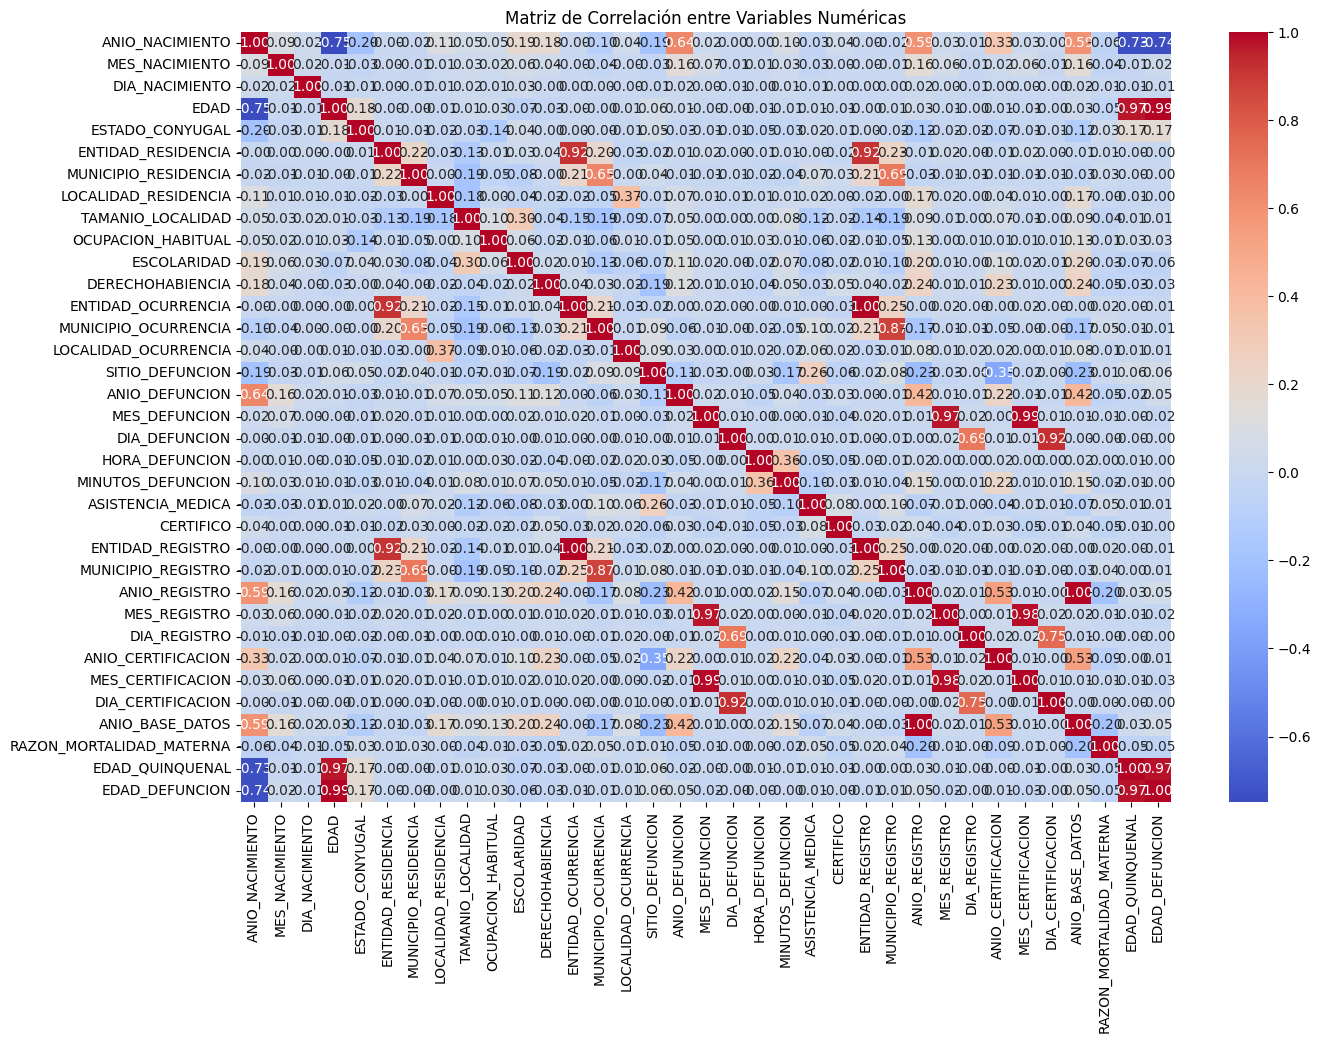

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selección de solo columnas numéricas para el análisis de correlación
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data[numerical_columns].corr()

# Visualización de la matriz de correlación
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()


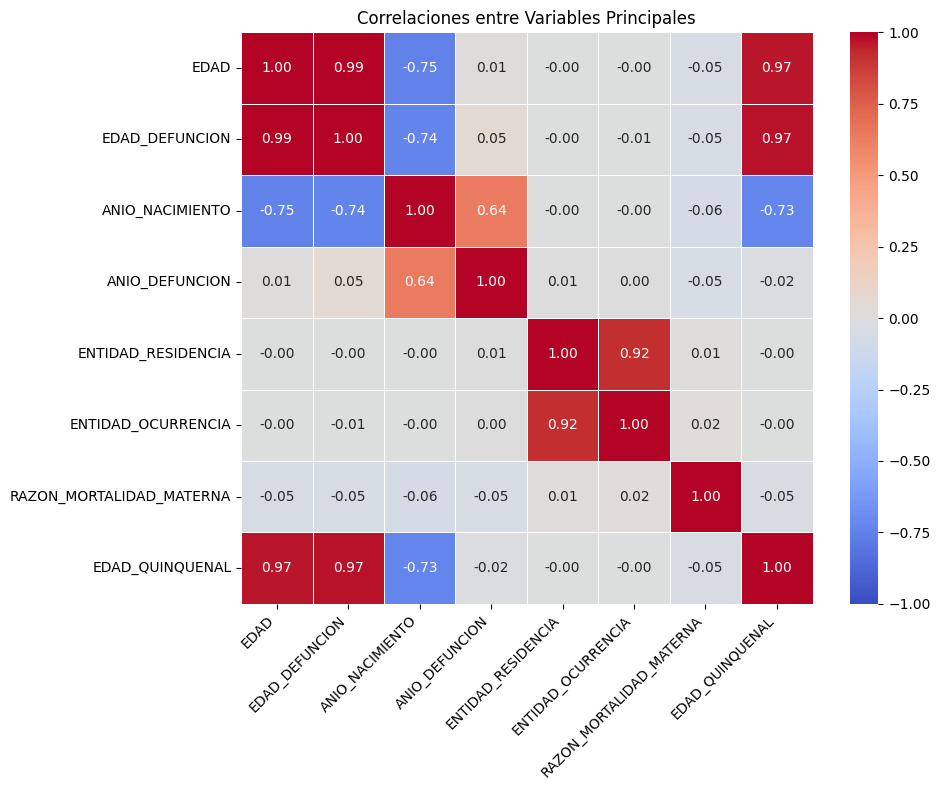


Correlaciones más significativas:
EDAD                EDAD_DEFUNCION        0.993939
EDAD_DEFUNCION      EDAD                  0.993939
                    EDAD_QUINQUENAL       0.973433
EDAD_QUINQUENAL     EDAD_DEFUNCION        0.973433
                    EDAD                  0.968408
EDAD                EDAD_QUINQUENAL       0.968408
ENTIDAD_OCURRENCIA  ENTIDAD_RESIDENCIA    0.917275
ENTIDAD_RESIDENCIA  ENTIDAD_OCURRENCIA    0.917275
ANIO_NACIMIENTO     ANIO_DEFUNCION        0.638128
ANIO_DEFUNCION      ANIO_NACIMIENTO       0.638128
ANIO_NACIMIENTO     EDAD_QUINQUENAL      -0.733818
EDAD_QUINQUENAL     ANIO_NACIMIENTO      -0.733818
EDAD_DEFUNCION      ANIO_NACIMIENTO      -0.739148
ANIO_NACIMIENTO     EDAD_DEFUNCION       -0.739148
                    EDAD                 -0.748514
EDAD                ANIO_NACIMIENTO      -0.748514
dtype: float64


In [4]:
# 1. Seleccionar variables de interés más relevantes
variables_importantes = [
    'EDAD',
    'EDAD_DEFUNCION', 
    'ANIO_NACIMIENTO',
    'ANIO_DEFUNCION',
    'ENTIDAD_RESIDENCIA',
    'ENTIDAD_OCURRENCIA',
    'RAZON_MORTALIDAD_MATERNA',
    'EDAD_QUINQUENAL'
]

# 2. Crear matriz de correlación con variables seleccionadas
correlation_subset = data[variables_importantes].corr()

# 3. Visualizar la matriz de correlación mejorada
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_subset,
    annot=True,
    cmap='coolwarm',
    center=0,
    fmt='.2f',
    square=True,
    linewidths=0.5,
    vmin=-1, 
    vmax=1
)

plt.title('Correlaciones entre Variables Principales')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 4. Mostrar las correlaciones más fuertes (en valor absoluto)
print("\nCorrelaciones más significativas:")
correlations = correlation_subset.unstack()
correlations = correlations[correlations != 1.0]  # Eliminar autocorrelaciones
correlations = correlations[abs(correlations) > 0.3].sort_values(ascending=False)
print(correlations)

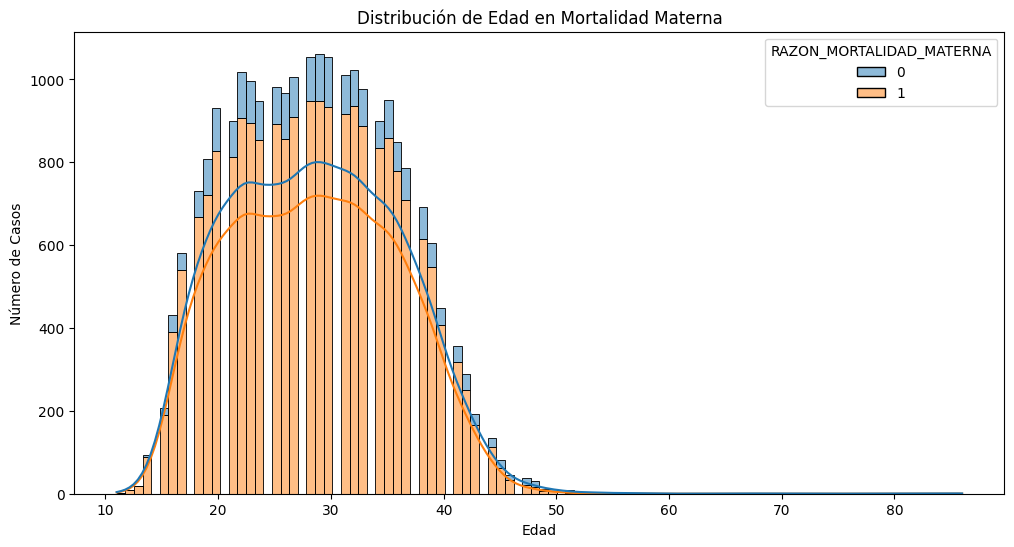

In [5]:
# Visualización de edad y razón de mortalidad materna
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='EDAD', hue='RAZON_MORTALIDAD_MATERNA', multiple='stack', kde=True)
plt.title("Distribución de Edad en Mortalidad Materna")
plt.xlabel("Edad")
plt.ylabel("Número de Casos")
plt.show()
